In [1]:
import os #module to get the list of files in the directory for taking the dataset
import cv2 #module to read the images
import numpy as np #module to perform numerical operations
import pandas as pd #for DataFrames and Series
import matplotlib.pyplot as plt  #for plotting graphs
from sklearn.model_selection import train_test_split #for splitting the dataset into training and testing
from sklearn.neighbors import KNeighborsClassifier #for KNN classifier
from sklearn.metrics import accuracy_score #for calculating the accuracy of the model
from concurrent.futures import ThreadPoolExecutor, as_completed #for parallel processing
from scipy.spatial.distance import minkowski #for calculating the distance between the points
from sklearn.metrics import  confusion_matrix,precision_score,recall_score,f1_score #for calculating the confusion matrix, precision, recall and f1 score

In [2]:
def to_gray(image): #function to convert the image to grayscale
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
def get_nblocks(arr, tile_size=4): #function to get the blocks of the image, default block size is 4x4
    r, c = arr.shape
    tilings = []

    for i in range(0, r, tile_size):
        for j in range(0, c, tile_size):
            tiling = arr[i:i + tile_size, j:j + tile_size] #taking the block of the image
            tilings.append(tiling)

    return np.array(tilings) #returning the blocks of the image

In [4]:
def get_block_meansvars(arr): #function to get the mean and variance of the blocks
    means_vars = []
    for block in arr:
        means_vars.append([np.mean(block), np.var(block)]) #calculating the mean and variance of the block
    return np.array(means_vars)


In [5]:
def get_img_features(img): #function to get the features of the image that is mean and variance for each block
    blocks = get_nblocks(img)
    return get_block_meansvars(blocks)


In [6]:
def extract_features(filepath, label): #function to extract the features of the image
    img = cv2.imread(filepath)
    gray_img = to_gray(img)
    features = get_img_features(gray_img) #getting the features of the image that is after grayscaling
    return features, label


In [7]:
def load_imgs_from_directory(directory, label, num_images=None): #function to load the images from the directory
    images = []
    labels = []
    files = os.listdir(directory) #getting the list of files in the directory
    if num_images is not None:
        files = files[:num_images] #taking the first num_images from the list of files
    with ThreadPoolExecutor(max_workers=8) as executor:
        temp = [executor.submit(extract_features, os.path.join(directory, filename), label) for filename in files] #extracting the features of the images
        
        for i in as_completed(temp): #iterating through the features of the images
            features, lbl = i.result() #getting the features and label of the image
            images.append(features) #appending the features to the images
            labels.append(lbl) #appending the label to the labels
    return images, labels #returning the images and labels

In [8]:
train_fake='E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\FAKE' #path of the fake images
train_real='E:\zipp\college\Third Year\\5th Sem\ML\ML\Lab 3\\train\REAL' #path of the real images
num_images = 10000 #number of images to be taken

In [9]:
fake_images, fake_labels = load_imgs_from_directory(train_fake, 0, num_images=num_images) #loading the fake images
real_images, real_labels = load_imgs_from_directory(train_real, 1, num_images=num_images) #loading the real images

In [10]:
fake_images_mean , fake_images_var = [], [] #list to store the mean and variance of the fake images
for j in range(len(fake_images[0])):
    temp1, temp2 = [], []
    for i in range(num_images):
        temp1.append(fake_images[i][j][0]) #appending the mean of the image to temporary variable
        temp2.append(fake_images[i][j][1]) #appending the variance of the image to temporary variable
    fake_images_mean.append(temp1) #appending the mean of the image
    fake_images_var.append(temp2) #appending the variance of the image
fake_images_mean = np.array(fake_images_mean) #converting the list to numpy array
fake_images_var = np.array(fake_images_var) #converting the list to numpy array

real_images_mean , real_images_var = [], []
for j in range(len(fake_images[0])): #same as above for real images
    temp1, temp2 = [], [] 
    for i in range(num_images): 
        temp1.append(real_images[i][j][0]) #appending the mean of the image to temporary variable
        temp2.append(real_images[i][j][1]) #appending the variance of the image to temporary variable
    real_images_mean.append(temp1) #appending the mean of the image
    real_images_var.append(temp2) #appending the variance of the image
real_images_mean = np.array(real_images_mean) #converting the list to numpy array
real_images_var = np.array(real_images_var) #converting the list to numpy array

In [11]:
for i in range(64): #taking all the blocks for all the images
    temp1=real_images_mean[i] #taking the mean of the real images
    temp2=fake_images_mean[i] #taking the mean of the fake images
    print("Mean of "+str(j+1)+"th block of real images => " + str(np.mean(temp1)))
    print("Mean of "+str(j+1)+"th block of fake images => " + str(np.mean(temp2)))
    print("Std of "+str(j+1)+"th block of real images => " + str(np.std(temp1)))
    print("Std of "+str(j+1)+"th block of fake images => " + str(np.std(temp2)))

Mean of 64th block of real images => 133.39768125
Mean of 64th block of fake images => 102.15253125
Std of 64th block of real images => 67.82628748673167
Std of 64th block of fake images => 55.80225339381152
Mean of 64th block of real images => 134.60771875
Mean of 64th block of fake images => 109.4345125
Std of 64th block of real images => 65.41746641904227
Std of 64th block of fake images => 53.556349643796615
Mean of 64th block of real images => 136.42166875
Mean of 64th block of fake images => 112.78051875
Std of 64th block of real images => 63.696315310519715
Std of 64th block of fake images => 52.21041391657677
Mean of 64th block of real images => 137.201425
Mean of 64th block of fake images => 114.43456875
Std of 64th block of real images => 63.26674892370893
Std of 64th block of fake images => 51.49701636155388
Mean of 64th block of real images => 137.35331875
Mean of 64th block of fake images => 114.5045
Std of 64th block of real images => 63.16071521079399
Std of 64th block o

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


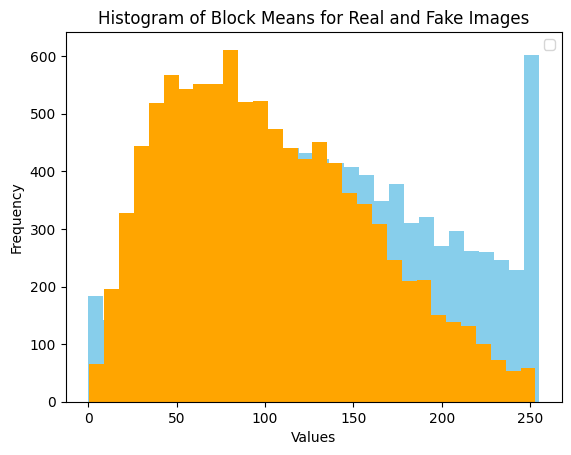

In [12]:
for i in range(1): #taking the first block of the images
    temp1=real_images_mean[i] #taking the mean of the first block, real images
    temp2=fake_images_mean[i] #taking the mean of the first block, fake images
    plt.hist(x=temp1, bins=30, color='skyblue') #plotting the histogram of the mean of the real images
    plt.hist(x=temp2, bins=30, color='orange') #plotting the histogram of the mean of the fake images
    
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Block Means for Real and Fake Images')
    plt.legend()
    plt.show()
fake_images_mean = np.transpose(fake_images_mean) #transposing the fake images mean
real_images_mean = np.transpose(real_images_mean) #transposing the real images mean
fake_images_var = np.transpose(fake_images_var) #transposing the fake images variance
real_images_var = np.transpose(real_images_var) #transposing the real images variance
features_m = np.vstack((fake_images_mean, real_images_mean)) #stacking the mean of the fake and real images
features_v = np.vstack((fake_images_var, real_images_var)) #stacking the variance of the fake and real images
labels = np.concatenate((fake_labels, real_labels)) #concatenating the labels of the fake and real images

In [13]:
def feature_vec(mean, var): #function to combine the mean and variance of the images
    a = []
    # Iterate through the mean and variance lists simultaneously
    for i, j in zip(mean, var):
        b = []
        # Combine the mean and variance for each block into a single vector
        for k, l in zip(i, j):
            b.append(k)  # Append the mean value
            b.append(l)  # Append the variance value
        a.append(b)  # Append the combined vector for the current image
    
    # Return the list of feature vectors
    return a

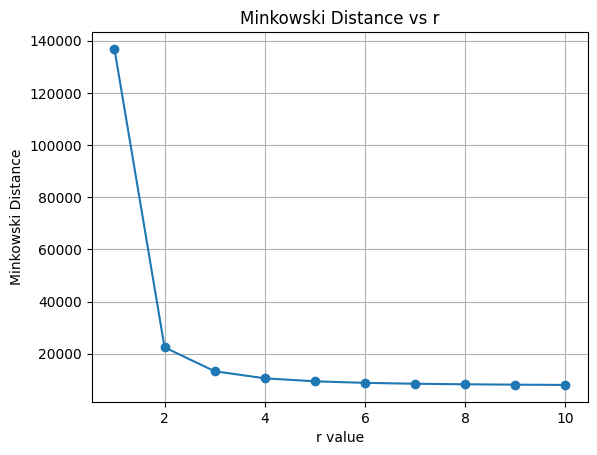

In [14]:
# Convert mean and variance features into feature vectors for real and fake images
real_feat_vec = feature_vec(real_images_mean, real_images_var)
fake_feat_vec = feature_vec(fake_images_mean, fake_images_var)

# Define a range of r values for the Minkowski distance calculation
r_values = range(1, 11)
# Calculate the Minkowski distance between the first feature vector of real and fake images for each r value
distances = [minkowski(real_feat_vec[0], fake_feat_vec[0], r) for r in r_values]

plt.plot(r_values, distances, marker='o') # Plot the Minkowski distance against r values
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.grid(True)
plt.show()

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features_m, labels, test_size=0.2, random_state=32)

knn = KNeighborsClassifier(n_neighbors=3) # Initialize and train the K-Nearest Neighbors classifier
knn.fit(X_train, Y_train) # Fit the classifier to the training data

# Evaluate the classifier's accuracy on the test set
accuracy = knn.score(X_test, Y_test)
print("Accuracy:", accuracy)

# Evaluate the classifier's accuracy on the training set
training_accuracy = knn.score(X_train, Y_train)
print(f"Training Accuracy: {training_accuracy}")
predictions = knn.predict(X_test[:20])# Predict the labels for the first 20 samples in the test set
actual_labels = Y_test[:20] # Get the actual labels for the first 20 samples in the test set

# Create a DataFrame to compare predicted labels with actual labels
predicted_vs_actual = pd.DataFrame({"Actual": actual_labels, "Predicted": predictions})
predicted_vs_actual

Accuracy: 0.67825
Training Accuracy: 0.83325


,Actual,Predicted
0,1,1
1,1,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,1
7,1,1
8,0,1
9,0,0


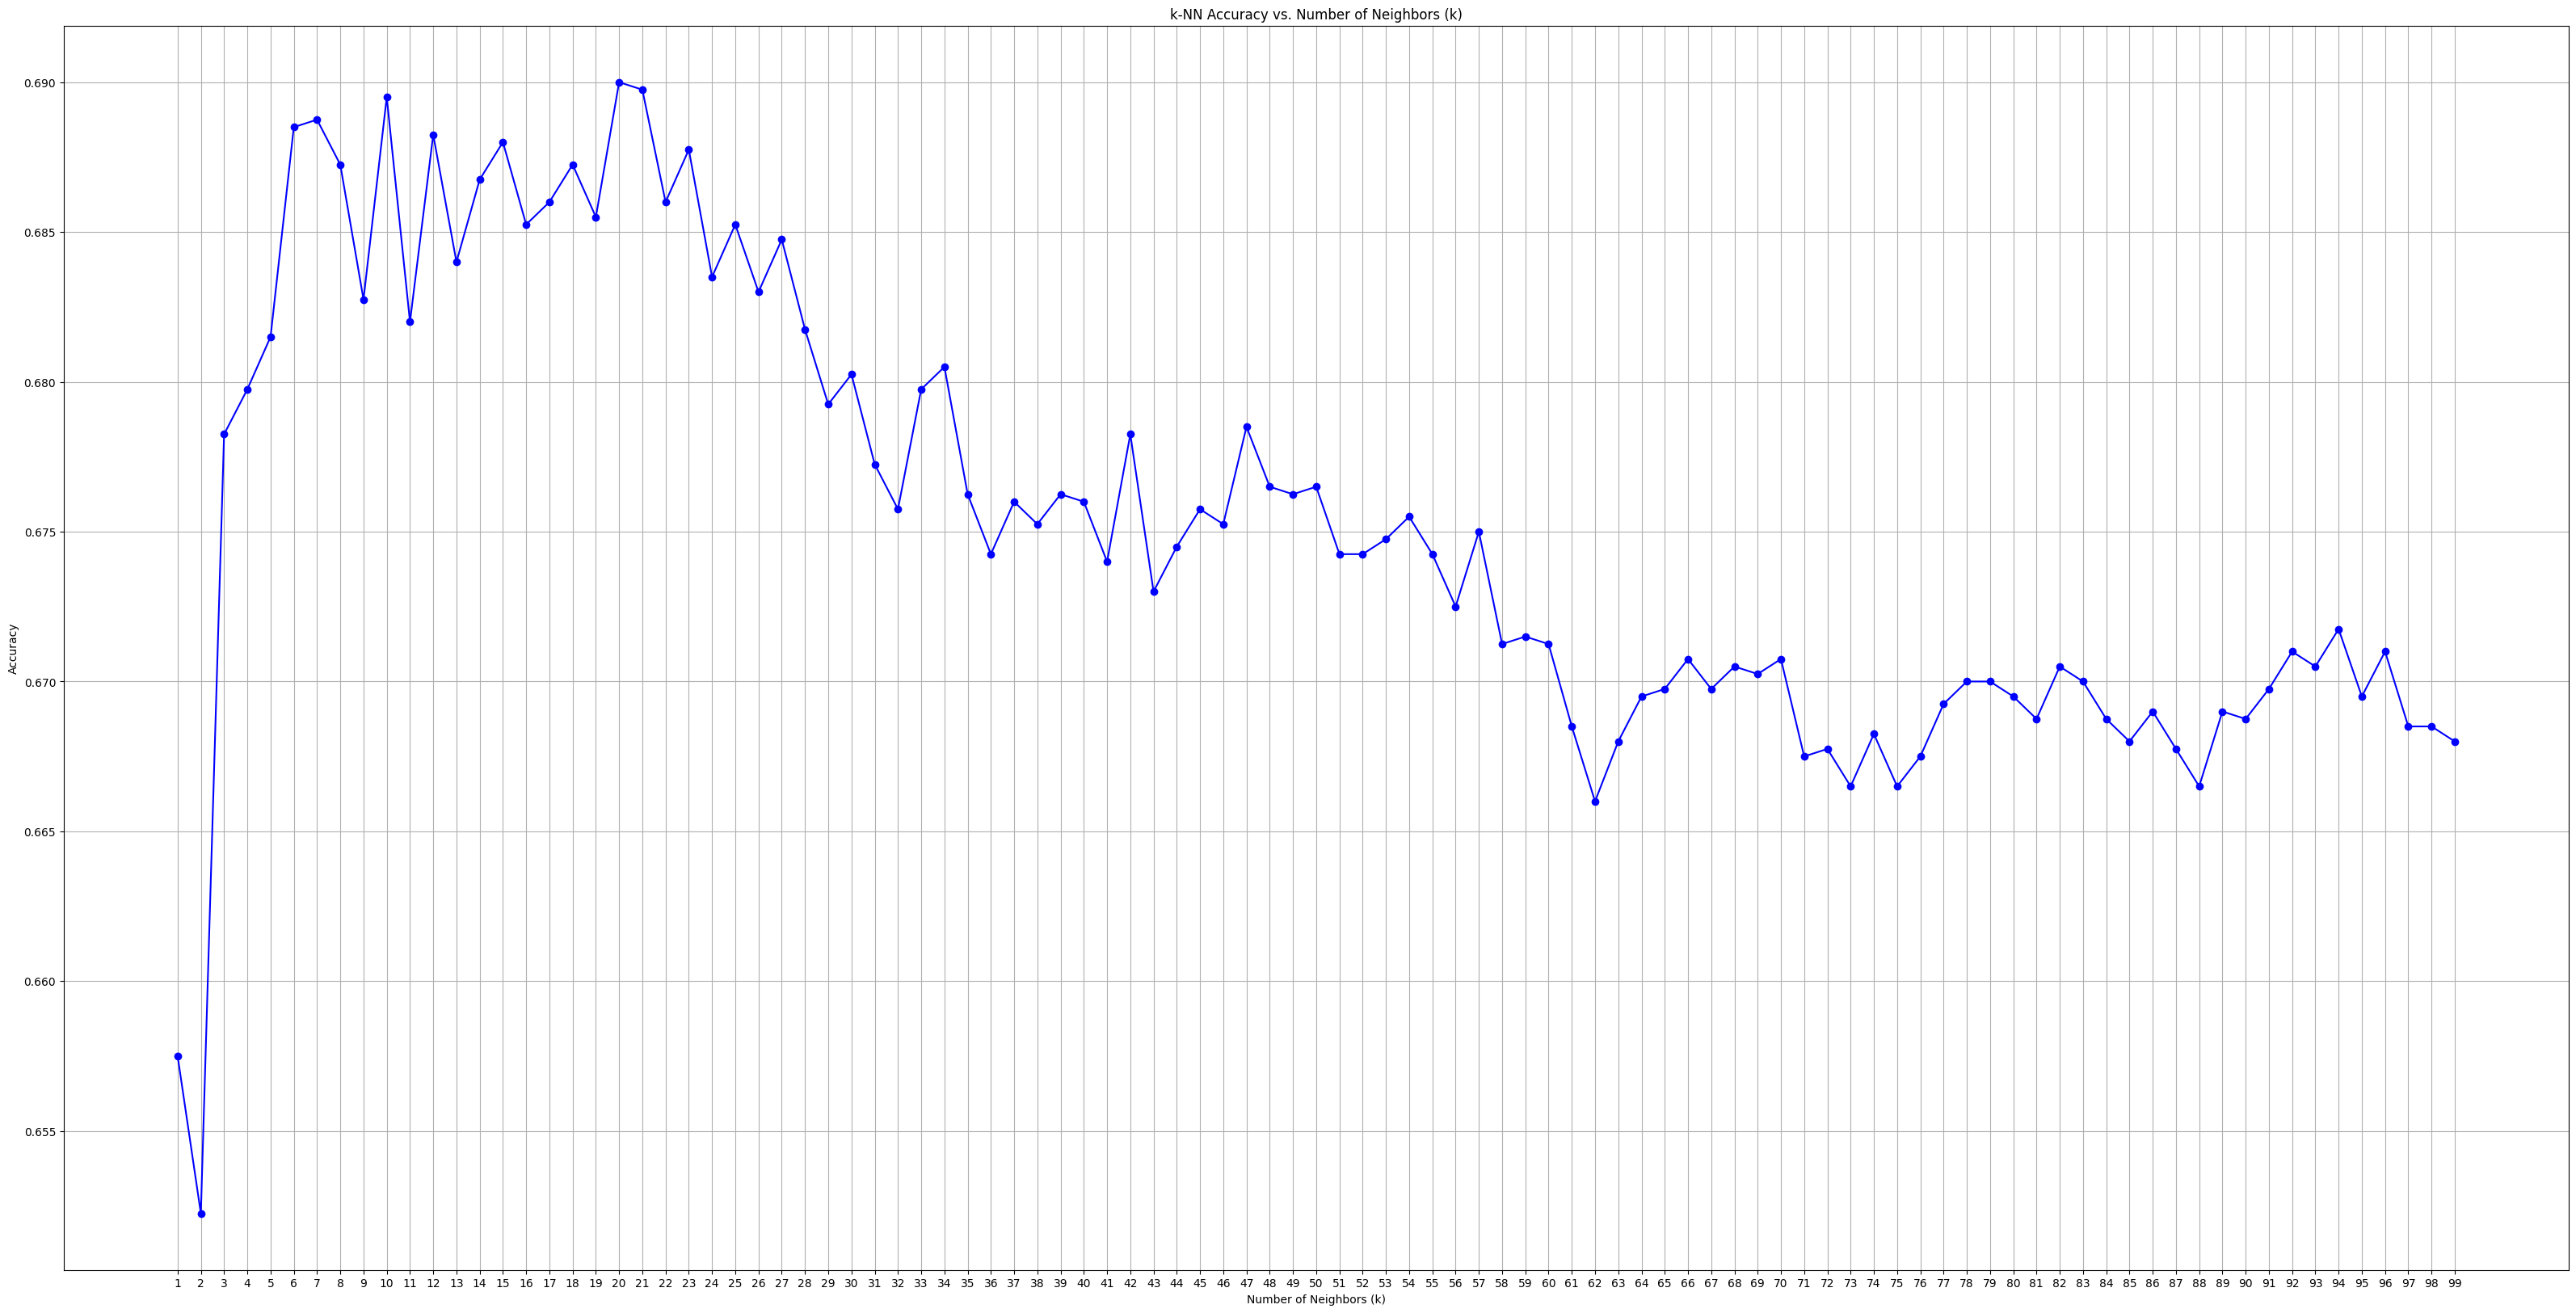

,K-Value,Accuracy
1,1,0.65750
2,2,0.65225
3,3,0.67825
4,4,0.67975
5,5,0.68150
...,...,...
95,95,0.66950
96,96,0.67100
97,97,0.66850
98,98,0.66850


In [16]:

k_values = range(1, 100) # Define a range of k values to test knn
accuracies = []

# Iterate over a range of k values to determine the best number of neighbors for the k-NN classifier
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) # Initialize the K-Nearest Neighbors classifier with k neighbors
    knn.fit(X_train, Y_train) # Fit the classifier to the training data
    Y_pred = knn.predict(X_test) # Predict the labels for the test set
    accuracy = accuracy_score(Y_test, Y_pred) # Calculate the accuracy of the classifier
    accuracies.append(accuracy) # Append the accuracy to the list of accuracies

# Create a DataFrame to compare k values with accuracies
accuracies_df = pd.DataFrame({"K-Value":k_values,"Accuracy": accuracies},index=k_values)

# Plot accuracy vs. number of neighbors (k)
plt.figure(figsize=(40,20))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.grid(True)
plt.show()

# Display the DataFrame containing k values and accuracies
accuracies_df  

In [19]:
# Calculate the confusion matrix for the predictions on the test set
conf_mat = confusion_matrix(Y_test,Y_pred)
# Calculate precision, recall, and F1 score for the predictions
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
f_score = f1_score(Y_test,Y_pred)

print(f"Confusion Matrix:\n{conf_mat}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f_score}")

Confusion Matrix:
[[1374  643]
 [ 685 1298]]
Precision: 0.6687274600721278
Recall: 0.6545637922339889
F1 Score: 0.6615698267074414
